In [1]:

import matplotlib.pyplot as plt
import pickle
import numpy as np
import sys
import os
import pandas as pd
import seaborn as sns 
import matplotlib.colors as colors
import matplotlib.cm as cmx

In [2]:
speeds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,2.0]

In [3]:
def bar(t, xc, b = 0.160, v = 1):

    if xc >=-b+v*t and xc <=b+v*t :
        return 1
    else: 
        return 0

In [4]:
#load example network with and without plasticity

data = {}
cell = 150

nets_list = ['Reciporcal_mono_linear_plastic_opt/noGCGainControl/only_one_plasticity/betaA/betaA_0.03',
             'Reciporcal_mono_linear_plastic_opt/noGCGainControl/only_one_plasticity/betaA/betaA_0.0']


nets_list = ['Reciporcal_mono_linear_plastic_opt/noGCGainControl//betaB/betaB_0.0',
             'Reciporcal_mono_linear_plastic_opt/noGCGainControl/fixed/wBA/wBA_46.0']


for net in nets_list:
    
    data[net] = {}

    bars = []
    tps_rf_GC_mid = []
    times = []

    Fs = []
    RBs = []
    RAs = []
    RGs = []
    OBs = []
    OAs = []

    peaks_RG = []
    peaks_RB = []
    peaks_drive = []

    amps_RB = []
    amps_RA = []
    amps_RG = []
    amps_drive = []

    ants_RB_drive = []
    ants_RB_bar = []

    ants_RG_drive = []
    ants_RG_bar = []

    omins_B = []
    omins_A = []

    for s in speeds: 


        net = 'ff_thesis_linear'
        # load dataframe 

        home = os.path.expanduser("~")
        fp = f'{home}/Documents/Simulations/motion_anticipation_network/{net}'

        fp = f'/user/sebert/home/Documents/Simulations/motion/anticipation_1D/Reciporcal/{net}/smooth_{s}'
        with open(f'{fp}/out', 'rb') as handle:
            out = pickle.load(handle)    
            
        with open(f'{fp}/params', 'rb') as handle:
            paramsi = pickle.load(handle)
            
        duration = paramsi['duration']
        dt = paramsi['dt']
        time = np.arange(0,duration,dt) #- (paramsi['spacing']*cell)/paramsi['speed']#*1000#+45
        pos_cell = paramsi['pos_rf_GC_mid'][cell]
        barr = [bar(t,pos_cell, v = s) for t in time]
        tp_bar = paramsi['tps_rf_GC_mid'][cell]

        peak_RB = time[np.argmax(out['RB'][50,:])]
        peak_RG = time[np.argmax(out['RG'][:])]
        peak_drive = time[np.argmax(out['F'][:])]

        amp_RB = np.max(out['RB'][50,:])
        amp_RA = np.max(out['RA'][50,:])
        amp_RG = np.max(out['RG'][:])
        amp_drive = np.max(out['F'][:])

        omin_B = np.min(out['OB'][50,:])
        omin_A = np.min(out['OA'][50,:])


        # RAM
        ant_RB_drive =  peak_drive - peak_RB
        ant_RB_bar  =  tp_bar - peak_RB

        ant_RG_drive =  peak_drive - peak_RG
        ant_RG_bar =  tp_bar - peak_RG

        #bars.append(barr)
        tps_rf_GC_mid.append(tp_bar)
        times.append(time)

        Fs.append(out['F'])
        RBs.append(out['RB'][50,:])
        RAs.append(out['RA'][50,:])
        RGs.append(out['RG'])
        OBs.append(out['OB'][50,:])
        OAs.append(out['OA'][50,:])
        bars.append(barr)

        peaks_RB.append(peak_RB)
        peaks_RG.append(peak_RG)
        peaks_drive.append(peak_drive)

        amps_RB.append(amp_RB)
        amps_RA.append(amp_RA)
        amps_RG.append(amp_RG)
        amps_drive.append(amp_drive)

        ants_RB_drive.append(ant_RB_drive)
        ants_RB_bar.append(ant_RB_bar)
        
        ants_RG_drive.append(ant_RG_drive)
        ants_RG_bar.append(ant_RG_bar)

        omins_B.append(omin_B)
        omins_A.append(omin_A)

        # get amplitudes 


    data[net]['peaks']={}
    data[net]['peaks']['RB'] = np.asarray(peaks_RB)
    data[net]['peaks']['RG'] = np.asarray(peaks_RG)
    data[net]['peaks']['drive'] =np.asarray( peaks_drive)

    data[net]['amps']={}
    data[net]['amps']['RB'] = np.asarray(amps_RB)
    data[net]['amps']['RA'] = np.asarray(amps_RA)
    data[net]['amps']['RG'] = np.asarray(amps_RG)
    data[net]['amps']['drive'] =np.asarray( amps_drive)
    
    data[net]['omin'] = {}
    data[net]['omin']['B'] = np.asarray(omins_B)
    data[net]['omin']['A'] = np.asarray(omins_A)

    data[net]['ants'] ={}
    data[net]['ants']['RB_drive'] =np.asarray(ants_RB_drive)
    data[net]['ants']['RB_bar'] =np.asarray(ants_RB_bar)
    data[net]['ants']['RG_drive'] =np.asarray(ants_RG_drive)
    data[net]['ants']['RG_bar'] =np.asarray(ants_RG_bar)
    
    data[net]['RB'] = RBs
    data[net]['RA'] = RAs
    data[net]['RG'] = RGs
    data[net]['F'] = Fs
    data[net]['OB'] = OBs
    data[net]['OA'] = OAs

    data['bars'] = bars
    data['tps_rf_mid'] = np.asarray(tps_rf_GC_mid)
    data['times'] = times


net_plastic = nets_list[0]
net_fixed = nets_list[1]

# Figure parameter



In [5]:
fontsize_legend = 12
fontsize_labels = 15
fontsize_panellabel = 30
fontsize_ticks = 12
lw = 4
ms = 60

figsize_ratio = 3
figsize = (16,12)

save = True
save_name = "Figure 1"
show = True
image_format = "png"
dpi = 300
panellabel_position = [-0.08, .85]


In [6]:
speeds_plot = [0.1,0.5,1.0]
speeds_plot_idx = [0,4,-2]
xlims = [(2,12),(1.2,3),(0.2,0.75)]

In [7]:
%matplotlib inline

# example for plasticity in bipolars

Text(-0.08, 1.1, 'C')

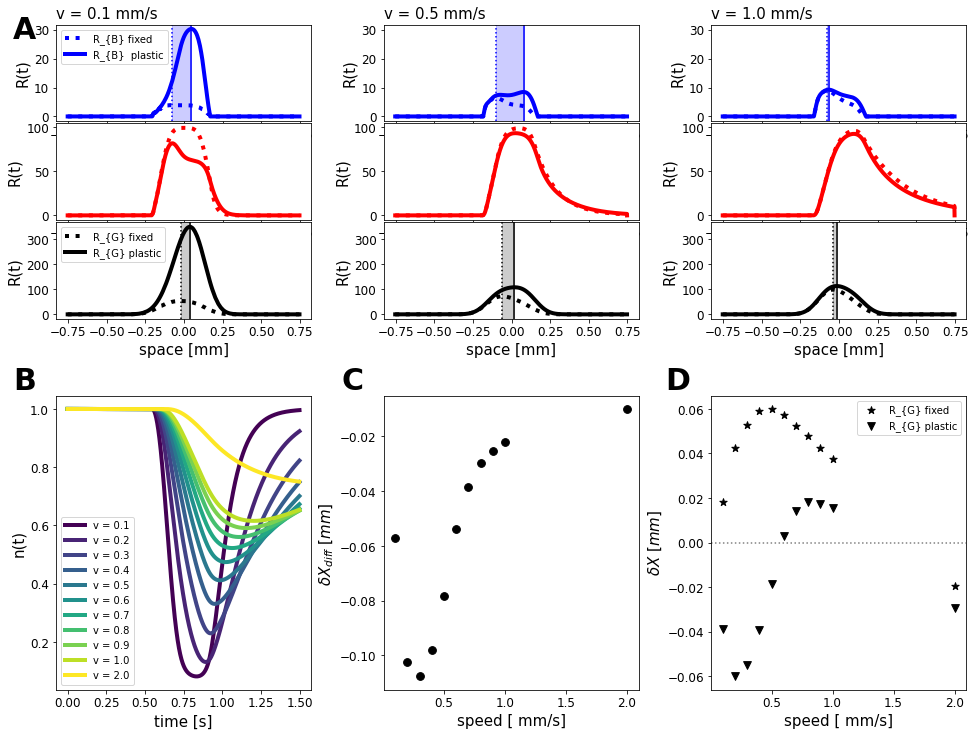

In [9]:
c0 = 'blue'
c1 = 'red'
c2 = 'k'
cbar = 'grey'
#initialize figure
nrows = 27
ncols = 6

fig = plt.figure(figsize=figsize)
#fig = plt.figure(figsize=(ncols*figsize_ratio,nrows*figsize_ratio))
fig.patch.set_facecolor('white')


gs = fig.add_gridspec(nrows,ncols)
#fig.tight_layout()


#TODO adjustment
#TODO adjustment
fig.subplots_adjust(top=0.88,
bottom=0.11,
left=0.11,
right=0.9,
hspace=0.12,
wspace=0.795)



#TODO remove axis

#TODO fontsizes



#weights = [0.0,10.0,50.0,100.0]


for x,s in enumerate(speeds_plot):
    i = speeds_plot_idx[x]
    #title
    if i == 0:
        ax = fig.add_subplot(gs[0:4,2*x:2*x+2])
        ax1 = fig.add_subplot(gs[4:8,2*x:2*x+2])
        ax2 = fig.add_subplot(gs[8:12,2*x:2*x+2])


        ax.text(panellabel_position[0]-0.0,panellabel_position[1]+0.25, "A", transform=ax.transAxes,
       fontsize=fontsize_panellabel, fontweight='bold', va='top', ha='right')
    else:
        ax = fig.add_subplot(gs[0:4,2*x:2*x+2], sharey = ax)
        ax1 = fig.add_subplot(gs[4:8,2*x:2*x+2], sharey = ax1)
        ax2 = fig.add_subplot(gs[8:12,2*x:2*x+2], sharey = ax2)
      
    ax.set_title(f'v = {s} mm/s', loc = 'left', fontsize = fontsize_labels)
    # plot bar
    xdata =(data['times'][i]- data['tps_rf_mid'][i])*s 

    #ax.plot(xdata,data['bars'][i], label = f'bar', color = cbar)

        
    ax.plot(xdata,data[net_fixed]['RB'][i], color = 'blue', linestyle = ':', label = 'R_{B} fixed', linewidth = lw)
    ax.plot(xdata,data[net_plastic]['RB'][i], color = 'blue', label = 'R_{B}  plastic', linewidth = lw)

    ax1.plot(xdata,data[net_fixed]['RA'][i], color = c1, linestyle = ':', label = 'R_{A} fixed' , linewidth = lw)
    ax1.plot(xdata,data[net_plastic]['RA'][i], color = c1, label = 'R_{A}  plastic', linewidth = lw)

    # ax.plot(data['times'][0],data[net_fixed]['RA'][0], color = 'red', linestyle = ':', label = 'fixed' )
    # ax.plot(data['times'][0],data[net_plastic]['RA'][0], color = 'red', label = 'plastic')

    ax2.plot(xdata,data[net_fixed]['RG'][i], color = c2, linestyle = ':', label = 'R_{G} fixed', linewidth = lw )
    ax2.plot(xdata,data[net_plastic]['RG'][i], color = c2, label = 'R_{G} plastic', linewidth = lw)


    ax.set_ylabel('R(t)', fontsize = fontsize_labels)
    ax2.set_ylabel('R(t)', fontsize = fontsize_labels)
    ax1.set_ylabel('R(t)', fontsize = fontsize_labels)
    ax2.set_xlabel('space [mm]', fontsize = fontsize_labels)
    ax.tick_params(labelsize = fontsize_ticks)
    ax1.tick_params(labelsize = fontsize_ticks)
    ax2.tick_params(labelsize = fontsize_ticks)

    # ax.axvline(0, color = cbar, linestyle = ':')
    # ax2.axvline(0, color = cbar, linestyle = ':')

    t_fixed = data[net_fixed]['peaks']['RB'][i]*s  - data['tps_rf_mid'][i]*s
    t_plastic = data[net_plastic]['peaks']['RB'][i]*s  - data['tps_rf_mid'][i]*s
    ax.axvline(t_fixed , color = c0, linestyle = ':')
    ax.axvline(t_plastic, color = c0)
    ax.axvspan(t_fixed,t_plastic, color = c0, alpha =0.2)
    
    # t_fixed = data[net_fixed]['peaks']['RA'][i]*s  - data['tps_rf_mid'][i]*s
    # t_plastic = data[net_plastic]['peaks']['RA'][i]*s  - data['tps_rf_mid'][i]*s
    # ax1.axvline(t_fixed , color = c1, linestyle = ':')
    # ax1.axvline(t_plastic, color = c1)
    # ax1.axvspan(t_fixed,t_plastic, color = c1, alpha =0.2)

    t_fixed = data[net_fixed]['peaks']['RG'][i]*s  - data['tps_rf_mid'][i]*s
    t_plastic = data[net_plastic]['peaks']['RG'][i]*s  - data['tps_rf_mid'][i]*s
    ax2.axvline(t_fixed , color = c2, linestyle = ':')
    ax2.axvline(t_plastic, color = c2)
    ax2.axvspan(t_fixed,t_plastic, color = c2, alpha =0.2)

    if x == 0:
        ax.legend()
        ax2.legend()


shades_of_blue = plt.get_cmap('viridis',len(speeds))


ax = fig.add_subplot(gs[15:,:2])
for i,s in enumerate(speeds):
    ax.plot(data['times'][i]*s,data[net_plastic]['OA'][i], label = f'v = {s}', color = shades_of_blue(i), linewidth = lw)

ax.legend()
ax.set_xlabel('time [s]', fontsize = fontsize_labels)
ax.set_ylabel('n(t)', fontsize = fontsize_labels)

ax.tick_params(labelsize = fontsize_ticks)


ax.text(panellabel_position[0]-0.0,panellabel_position[1]+0.25, "B", transform=ax.transAxes,
       fontsize=fontsize_panellabel, fontweight='bold', va='top', ha='right')

ax = fig.add_subplot(gs[15:,4:])

ax.scatter(speeds, data[net_fixed]['ants']['RG_bar']*speeds, color = c2, marker = '*', label = 'R_{G} fixed', s = ms)
ax.scatter(speeds, data[net_plastic]['ants']['RG_bar']*speeds, marker = 'v',color = c2, label = 'R_{G} plastic', s = ms)
ax.legend()
ax.axhline(0,color = cbar, linestyle = ':')
ax.set_xlabel('speed [ mm/s]', fontsize = fontsize_labels)
ax.set_ylabel('$\delta X$ $[mm]$', fontsize = fontsize_labels)

ax.tick_params(labelsize = fontsize_ticks)

ax.text(panellabel_position[0]-0.0,panellabel_position[1]+0.25, "D", transform=ax.transAxes,
       fontsize=fontsize_panellabel, fontweight='bold', va='top', ha='right')

ax = fig.add_subplot(gs[15:,2:4])

ax.scatter(speeds, -1*(data[net_fixed]['ants']['RG_bar']*speeds -  data[net_plastic]['ants']['RG_bar']*speeds), color = c2, marker = 'o' ,s = ms)
#ax.scatter(speeds, data[net_fixed]['ants']['RB_bar']*speeds -  data[net_plastic]['ants']['RB_bar']*speeds, color = c1, marker = 'o')

ax.set_xlabel('speed [ mm/s]', fontsize = fontsize_labels)
ax.set_ylabel(r'$\delta X_{diff}$ $[mm]$ ', fontsize = fontsize_labels)
#ax.scatter(speeds, data[net_fixed]['amps']['RB'])
ax.tick_params(labelsize = fontsize_ticks)


ax.text(panellabel_position[0]-0.0,panellabel_position[1]+0.25, "C", transform=ax.transAxes,
       fontsize=fontsize_panellabel, fontweight='bold', va='top', ha='right')
